# IMPORTING PACKAGE 📚📦

In [102]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, skew
from scipy import stats 

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
import math
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# DATA OVERVIEWS 📊 📊

In [103]:
train_df = pd.read_csv("../input/spaceship-titanic/train.csv")
test_df = pd.read_csv('../input/spaceship-titanic/test.csv')
sample_submission = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")

In [104]:
train_df['VIP'] = train_df['VIP'].map({True: 1, False: 0})
train_df['CryoSleep'] = train_df['CryoSleep'].map({True: 1, False: 0})
train_df['Transported'] = train_df['Transported'].map({True: 1, False: 0})

In [105]:
train_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1


In [106]:
test_df['VIP'] = test_df['VIP'].map({True: 1, False: 0})
test_df['CryoSleep'] = test_df['CryoSleep'].map({True: 1, False: 0})

In [107]:
test_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,1.0,G/3/S,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,0.0,F/4/S,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


In [108]:
sample_submission.head(2)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False


In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   float64
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   float64
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 950.9+ KB


In [110]:
column_names = train_df.columns
column_names

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [111]:
train_df.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8476.000000,8514.000000,8490.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,0.358306,28.827930,0.023439,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,0.479531,14.489021,0.151303,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,38.000000,0.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [112]:
train_df.describe(include=['O'])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8492,8494,8511,8493
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Gollux Reedall
freq,1,4602,8,5915,2


In [113]:
concatenated_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
concatenated_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0


In [114]:
y_train = train_df["Transported"]
y_train.head(2)

0    0
1    1
Name: Transported, dtype: int64

In [115]:
all_data_na = (concatenated_df.isnull().sum() / len(concatenated_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:20]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
# missing_data

# Analysis of cabin data 🔍🔍

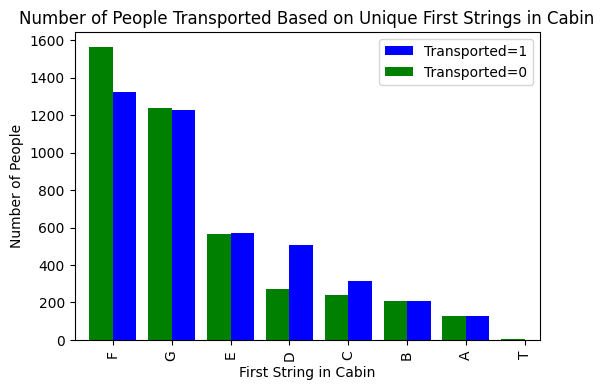

In [116]:
# Sample Cabin data
cabin_data = train_df["Cabin"]

# Create a DataFrame from the cabin data
cabin_df = pd.DataFrame({'Cabin': cabin_data})

# Extract the first string before the first "/"
cabin_df['FirstString'] = cabin_df['Cabin'].str.split('/').str[0]

# Add the 'Transported' column to the cabin_df DataFrame
cabin_df['Transported'] = train_df['Transported']

# Calculate unique first strings frequencies for Transported == 1 and Transported == 0
unique_first_strings_1 = cabin_df[cabin_df['Transported'] == 1]['FirstString'].value_counts()
unique_first_strings_0 = cabin_df[cabin_df['Transported'] == 0]['FirstString'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
unique_first_strings_1.plot(kind='bar', color='b', width=0.4, position=0, label='Transported=1')
unique_first_strings_0.plot(kind='bar', color='g', width=0.4, position=1, label='Transported=0')
plt.xlabel('First String in Cabin')
plt.ylabel('Number of People')
plt.title('Number of People Transported Based on Unique First Strings in Cabin')
plt.legend()
plt.show()

In [117]:
concatenated_df['cabin_ids'] = concatenated_df['Cabin'].str.split('/').str[0]
concatenated_df['cabin_place'] = concatenated_df['Cabin'].str.split('/').str[2]
concatenated_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_ids,cabin_place
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,B,P
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,F,S


# Drop of columns ❌

In [118]:
concatenated_df['PassengerId_group'] = concatenated_df['PassengerId'].str.split('_').str[0]

In [119]:
concatenated_df['Name_surname'] = concatenated_df['Name'].str.split(' ').str[-1]
concatenated_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_ids,cabin_place,PassengerId_group,Name_surname
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,B,P,0001,Ofracculy
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,F,S,0002,Vines


In [120]:
# List of features to be dropped
features_to_drop = ["PassengerId","Cabin","Name"]

# Drop the specified features from the concatenated DataFrame
concatenated_df.drop(features_to_drop, axis=1, inplace=True)

# Now, concatenated_df does not contain the specified features
concatenated_df.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_ids,cabin_place,PassengerId_group,Name_surname
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,P,0001,Ofracculy
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,F,S,0002,Vines


# Row with atleast one nan 🧩🧩

In [121]:
### Number of cell null
n=1
# Find rows where at least n out of 13 columns have missing data
rows_with_missing_data = train_df[train_df.isnull().sum(axis=1) >= n]

# Print the result
rows_with_missing_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,1.0,G/0/S,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,1
10,0008_02,Europa,1.0,B/1/P,TRAPPIST-1e,34.0,0.0,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,1
15,0012_01,Earth,0.0,NaN,TRAPPIST-1e,31.0,0.0,32.0,0.0,876.0,0.0,0.0,Justie Pooles,0
16,0014_01,Mars,0.0,F/3/P,55 Cancri e,27.0,0.0,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,0
23,0020_03,Earth,1.0,E/0/S,55 Cancri e,29.0,0.0,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,0.0,E/597/P,TRAPPIST-1e,29.0,0.0,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,1
8674,9257_01,NaN,0.0,F/1892/P,TRAPPIST-1e,13.0,0.0,39.0,0.0,1085.0,24.0,0.0,Ties Apple,0
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,0.0,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,1
8684,9274_01,NaN,1.0,G/1508/P,TRAPPIST-1e,23.0,0.0,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,1


# Filling the NAN cells 🛠️ 🛠️

In [122]:
concatenated_df["expenses"]=concatenated_df["RoomService"]+concatenated_df["FoodCourt"]+concatenated_df["ShoppingMall"]+concatenated_df["Spa"]+concatenated_df["VRDeck"]

In [123]:
concatenated_df.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_ids,cabin_place,PassengerId_group,Name_surname,expenses
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,P,0001,Ofracculy,0.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,F,S,0002,Vines,736.0


In [124]:
# Function to fill NaN values in HomePlanet and Destination column
def fill_HomePlanet_Destination(row, column_name):
    if pd.notnull(row[column_name]):
        return row[column_name]
    group = concatenated_df.loc[concatenated_df['PassengerId_group'] == row['PassengerId_group'], column_name]
    if not group.empty and pd.notnull(group.values[0]):
        return group.values[0]
    group = concatenated_df.loc[concatenated_df['Name_surname'] == row['Name_surname'], column_name]
    if not group.empty and pd.notnull(group.values[0]):
        return group.values[0]
    group = concatenated_df.loc[concatenated_df['cabin_ids'] == row['cabin_ids'], column_name]
    if not group.empty and pd.notnull(group.values[0]):
        return group.values[0]
    print(concatenated_df[column_name].mode()[0])
    return concatenated_df[column_name].mode()[0]

In [125]:

# Apply the function to fill NaN values in HomePlanet and Destination column
column_name = 'HomePlanet'
print(concatenated_df[column_name].isnull().sum())
concatenated_df[column_name] = concatenated_df.apply(lambda row: fill_HomePlanet_Destination(row, column_name), axis=1)
print(concatenated_df[column_name].isnull().sum())

288
Earth
Earth
Earth
0


In [126]:

# Apply the function to fill NaN values in HomePlanet and Destination column
column_name = 'Destination'
print(concatenated_df[column_name].isnull().sum())
concatenated_df[column_name] = concatenated_df.apply(lambda row: fill_HomePlanet_Destination(row, column_name), axis=1)
print(concatenated_df[column_name].isnull().sum())

274
0


In [127]:
# Calculate mean values for each group defined by the features
mean_age_by_homeplanet = concatenated_df.groupby(["HomePlanet", "Destination"])['Age'].mean()

# Function to fill NaN values in 'Age' column
def fill_age(row):
    if pd.notnull(row['Age']):
        return row['Age']
    homeplanet_features = (row['HomePlanet'], row['Destination'])
    if homeplanet_features in mean_age_by_homeplanet.index:
        return mean_age_by_homeplanet.loc[homeplanet_features]
    else:
        print("!!Not present!!")
        return concatenated_df['Age'].mean()  # Fill with overall mean if no matching group is found

# Apply the function to fill NaN values in 'Age' column
print(concatenated_df['Age'].isnull().sum())
concatenated_df['Age'] = concatenated_df.apply(fill_age, axis=1)
print(concatenated_df['Age'].isnull().sum())

270
0


In [128]:
# Set CryoSleep values based on RoomService and existing CryoSleep values
concatenated_df['CryoSleep'] = concatenated_df.apply(lambda row: 1 if pd.isnull(row['CryoSleep']) and row['RoomService'] == 0 else (0 if pd.isnull(row['CryoSleep']) else row['CryoSleep']), axis=1)

In [129]:
# Function to fill NaN values in VIP column
def fill_VIP(row):
    if pd.notnull(row['VIP']):
        return row['VIP']
    group = concatenated_df.loc[concatenated_df['PassengerId_group'] == row['PassengerId_group'], 'VIP']
    if not group.empty and pd.notnull(group.values[0]):
        return group.values[0]
    group = concatenated_df.loc[concatenated_df['Name_surname'] == row['Name_surname'], 'VIP']
    if not group.empty and pd.notnull(group.values[0]):
        return group.values[0]
    group = concatenated_df.loc[concatenated_df['cabin_ids'] == row['cabin_ids'], 'VIP']
    if not group.empty and pd.notnull(group.values[0]):
        return group.values[0]
    print(row['expenses']>1150)
    return row['expenses'] > 1150

# Apply the function to fill NaN values in VIP column
print(concatenated_df['VIP'].isnull().sum())
concatenated_df['VIP'] = concatenated_df.apply(fill_VIP, axis=1)
print(concatenated_df['VIP'].isnull().sum())

296
True
False
False
0


In [130]:
concatenated_df.isnull().sum()

HomePlanet              0
CryoSleep               0
Destination             0
Age                     0
VIP                     0
RoomService           263
FoodCourt             289
ShoppingMall          306
Spa                   284
VRDeck                268
Transported          4277
cabin_ids             299
cabin_place           299
PassengerId_group       0
Name_surname          294
expenses             1363
dtype: int64

In [131]:
# Function to fill NaN values in specified columns
def fill_column(row, column_name):
    if pd.notnull(row[column_name]):
        return row[column_name]
    group = concatenated_df.loc[concatenated_df['PassengerId_group'] == row['PassengerId_group'], column_name]
    if not group.empty and pd.notnull(group.values[0]):
        return group.values[0]
    group = concatenated_df.loc[concatenated_df['Name_surname'] == row['Name_surname'], column_name]
    if not group.empty and pd.notnull(group.values[0]):
        return group.values[0]
    group = concatenated_df.loc[concatenated_df['cabin_ids'] == row['cabin_ids'], column_name]
    if not group.empty and pd.notnull(group.values[0]):
        return group.values[0]
    if column_name == "expenses":
        return 130
    print(column_name)
    return 128

# List of columns to fill NaN values
columns_to_fill = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ,'expenses']

# Apply the function to fill NaN values in specified columns
for column in columns_to_fill:
    concatenated_df[column] = concatenated_df.apply(lambda row: fill_column(row, column), axis=1)

RoomService
FoodCourt
FoodCourt
FoodCourt
ShoppingMall
ShoppingMall
ShoppingMall
ShoppingMall
ShoppingMall
ShoppingMall
ShoppingMall
ShoppingMall
ShoppingMall
ShoppingMall
Spa
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck
VRDeck


In [132]:
# Fill NaN values in 'Name_surname','cabin_ids',cabin_place column with 'Unknown'
concatenated_df['Name_surname'] = concatenated_df['Name_surname'].fillna('Unknown')
concatenated_df['cabin_ids'] = concatenated_df['cabin_ids'].fillna('G')
concatenated_df['cabin_place'] = concatenated_df['cabin_place'].fillna('S')
print(concatenated_df.isnull().sum())

HomePlanet              0
CryoSleep               0
Destination             0
Age                     0
VIP                     0
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
Transported          4277
cabin_ids               0
cabin_place             0
PassengerId_group       0
Name_surname            0
expenses                0
dtype: int64


In [133]:
# List of features to be dropped
# features_to_drop = ["expenses","PassengerId_group"]
features_to_drop = ["PassengerId_group"]

# Drop the specified features from the concatenated DataFrame
concatenated_df.drop(features_to_drop, axis=1, inplace=True)

# Now, concatenated_df does not contain the specified features
concatenated_df.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_ids,cabin_place,Name_surname,expenses
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,P,Ofracculy,0.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,F,S,Vines,736.0


# Data Changing according to need (LabelEncoder) 🔄 🔄 🔄

In [134]:
label_encoder = LabelEncoder()

categorical_columns = concatenated_df.select_dtypes(include=['O']).columns.tolist()

for column in categorical_columns:
    concatenated_df[column] = label_encoder.fit_transform(concatenated_df[column])
    
concatenated_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_ids,cabin_place,Name_surname,expenses
0,1,0.0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1551,0.0
1,0,0.0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1.0,5,1,2290,736.0
2,1,0.0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,0,1,2153,10383.0
3,1,0.0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,1,2153,5176.0
4,0,0.0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,5,1,1924,1091.0


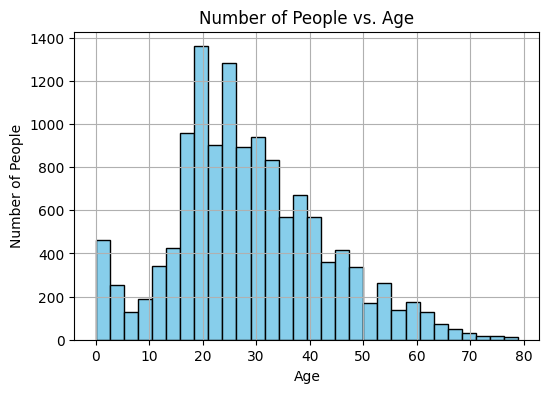

In [135]:
# Plot a histogram of the 'Age' column
plt.figure(figsize=(6, 4))
plt.hist(concatenated_df["Age"], bins=30, color='skyblue', edgecolor='black')
plt.title('Number of People vs. Age')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

In [136]:
# Define bins and labels for age groups
bins = [0, 12, 17, 25, 30, 50, float('inf')]
labels = [0, 1, 2, 3, 2, 1]

# Create a new column 'AgeGroup' based on the 'Age' column
concatenated_df['AgeGroup'] = pd.cut(concatenated_df['Age'], bins=bins, labels=labels, right=False,ordered=False)

concatenated_df.drop('Age', axis=1, inplace=True)

# Print the DataFrame with the new 'AgeGroup' column
concatenated_df.head(2)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_ids,cabin_place,Name_surname,expenses,AgeGroup
0,1,0.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1551,0.0,2
1,0,0.0,2,0,109.0,9.0,25.0,549.0,44.0,1.0,5,1,2290,736.0,2


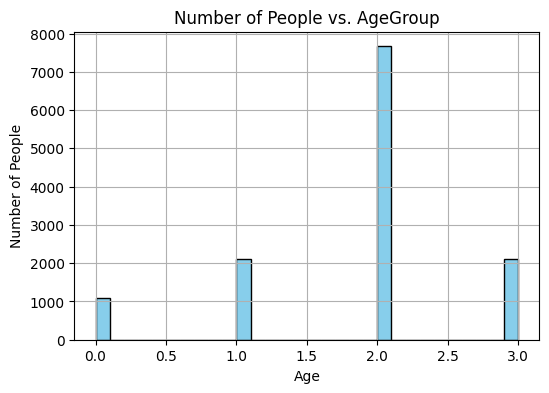

In [137]:
# Plot a histogram of the 'Age' column
plt.figure(figsize=(6, 4))
plt.hist(concatenated_df["AgeGroup"], bins=30, color='skyblue', edgecolor='black')
plt.title('Number of People vs. AgeGroup')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

# Checking skewness of dataset ↪️ ↪️

In [138]:
numeric_feats = concatenated_df.dtypes[concatenated_df.dtypes != "object"].index
skewed_feats = concatenated_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()


Skew in numerical features: 



,Skew
ShoppingMall,11.061039
VRDeck,8.031948
Spa,7.659013
FoodCourt,7.061630
VIP,6.546197


[    0.   736. 10383. ...     0.  3203.     0.]


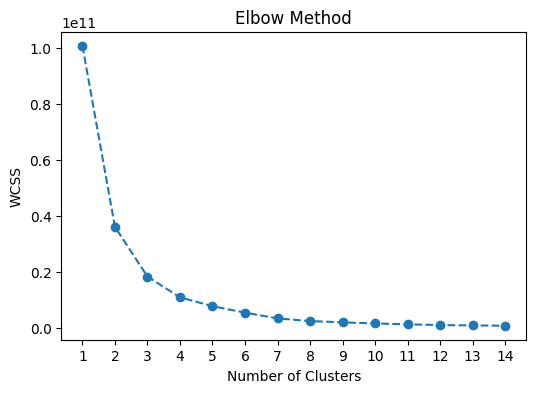

In [139]:
# Convert the expenses data to a NumPy array
expenses_data = np.array(concatenated_df["expenses"])
print(expenses_data)
# Calculate WCSS for different values of k
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(expenses_data.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(6, 4))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.xticks(np.arange(1, 15, 1))
plt.show()

In [140]:
# Find the optimal number of clusters using the Elbow Method
optimal_num_clusters = np.argmin(np.diff(wcss)) + 1

print("Optimal number of clusters:", optimal_num_clusters)

Optimal number of clusters: 1


In [141]:
optimal_clusters_curr=5
optimal_clusters_curr

5

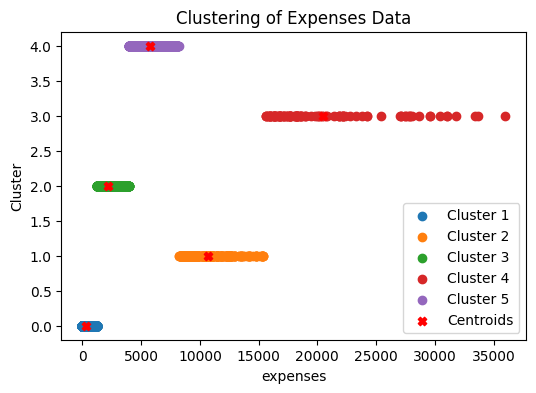

Cluster Labels:
[0 0 1 ... 0 2 0]


In [142]:
# Convert the expenses data to a NumPy array
expenses_data = np.array(concatenated_df["expenses"])

# Reshape the expenses data to be a 2D array
expenses_data_reshaped = expenses_data.reshape(-1, 1)

# Define the optimal number of clusters (found using the Elbow Method)
optimal_clusters = optimal_clusters_curr

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(expenses_data_reshaped)

# Visualize the clusters and data points
plt.figure(figsize=(6, 4))
for i in range(optimal_clusters):
    plt.scatter(expenses_data_reshaped[cluster_labels == i], [i] * len(expenses_data_reshaped[cluster_labels == i]), label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_, np.arange(optimal_clusters), color='red', marker='X', label='Centroids')
plt.xlabel('expenses')
plt.ylabel('Cluster')
plt.title('Clustering of Expenses Data')
plt.legend()
plt.show()

# Output the cluster labels for each data point
print("Cluster Labels:")
print(cluster_labels)

In [143]:
# Assuming you have determined the optimal number of clusters (optimal_clusters) using the Elbow Method
optimal_clusters = optimal_clusters_curr  # Replace this with the actual optimal number of clusters

# expenses data (assuming you already have this data)
expenses_data = np.array(concatenated_df["expenses"])

# Reshape the expenses data to be a 2D array
expenses_data_reshaped = expenses_data.reshape(-1, 1)

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(expenses_data_reshaped)

# Add the cluster labels as a new column to the DataFrame
concatenated_df["expenses_cluster"] = cluster_labels

In [144]:
# Columns to fill with cluster labels
columns_to_fill = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Assuming you have determined the optimal number of clusters (optimal_clusters) using the Elbow Method
optimal_clusters = optimal_clusters_curr  # Replace this with the actual optimal number of clusters

# Iterate through columns and apply clustering
for column in columns_to_fill:
    # Get the data for the current column
    column_data = np.array(concatenated_df[column])
    column_data_reshaped = column_data.reshape(-1, 1)
    
    # Apply KMeans clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(column_data_reshaped)
    
    # Add the cluster labels as a new column to the DataFrame
    concatenated_df[f"{column}_cluster"] = cluster_labels

In [145]:
# List of features to be dropped
features_to_drop = ["expenses",'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Drop the specified features from the concatenated DataFrame
concatenated_df.drop(features_to_drop, axis=1, inplace=True)

# Now, concatenated_df does not contain the specified features
concatenated_df.head(2)

,HomePlanet,CryoSleep,Destination,VIP,Transported,cabin_ids,cabin_place,Name_surname,AgeGroup,expenses_cluster,RoomService_cluster,FoodCourt_cluster,ShoppingMall_cluster,Spa_cluster,VRDeck_cluster
0,1,0.0,2,0,0.0,1,0,1551,2,0,0,3,0,0,2
1,0,0.0,2,0,1.0,5,1,2290,2,0,0,3,0,3,2


In [146]:
concatenated_df.drop("expenses_cluster", axis=1, inplace=True)
concatenated_df.head(2)

,HomePlanet,CryoSleep,Destination,VIP,Transported,cabin_ids,cabin_place,Name_surname,AgeGroup,RoomService_cluster,FoodCourt_cluster,ShoppingMall_cluster,Spa_cluster,VRDeck_cluster
0,1,0.0,2,0,0.0,1,0,1551,2,0,3,0,0,2
1,0,0.0,2,0,1.0,5,1,2290,2,0,3,0,3,2


In [147]:
concatenated_df.drop("Name_surname", axis=1, inplace=True)
concatenated_df.head(2)

,HomePlanet,CryoSleep,Destination,VIP,Transported,cabin_ids,cabin_place,AgeGroup,RoomService_cluster,FoodCourt_cluster,ShoppingMall_cluster,Spa_cluster,VRDeck_cluster
0,1,0.0,2,0,0.0,1,0,2,0,3,0,0,2
1,0,0.0,2,0,1.0,5,1,2,0,3,0,3,2


# Bar chat for all columns 📊📈

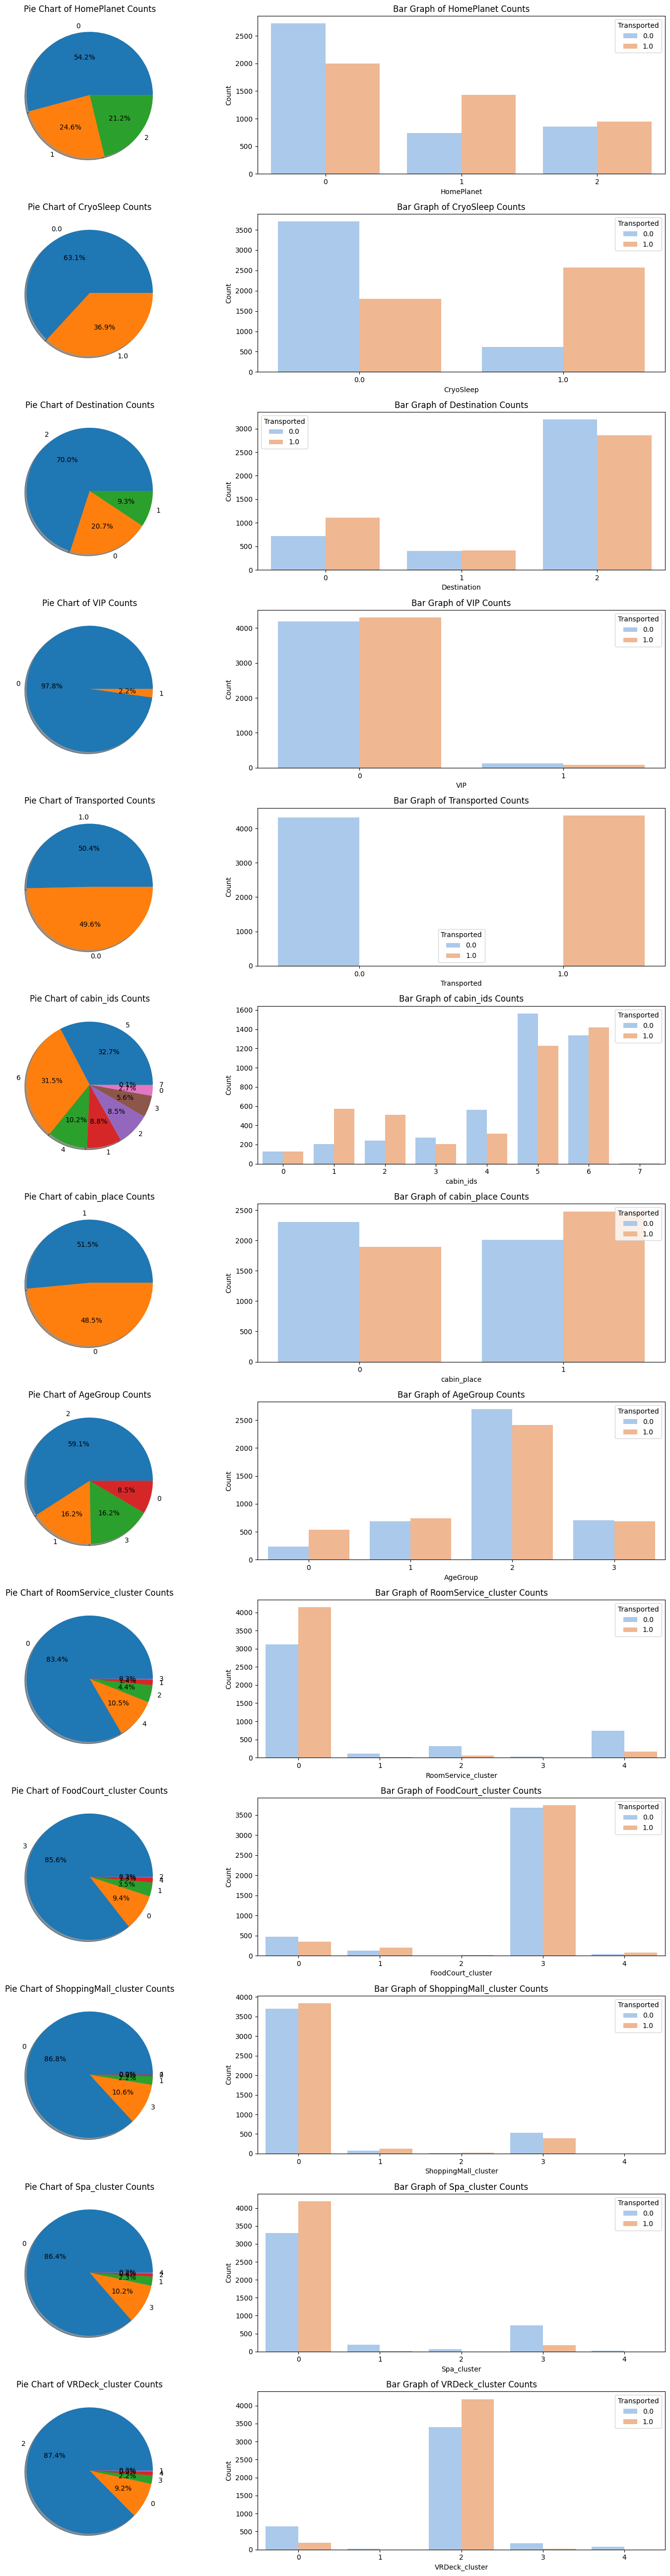

In [148]:
# Assuming univalue_columns is a list of column names containing unique values
columns_list = concatenated_df.columns

# Set up subplots
fig, axs = plt.subplots(len(columns_list), 2, figsize=(16, 4 * len(columns_list)))

for i, column in enumerate(columns_list):
    count_labels = concatenated_df[column].value_counts()

    # Plot pie chart
    axs[i, 0].pie(count_labels, labels=count_labels.index, autopct='%.1f%%', shadow=True)
    axs[i, 0].set_title(f'Pie Chart of {column} Counts')

    # Plot countplot
    sns.countplot(data=concatenated_df, x=column, hue='Transported', palette='pastel', ax=axs[i, 1])
    axs[i, 1].set_title(f'Bar Graph of {column} Counts')
    axs[i, 1].set_ylabel('Count')  # Assuming you want a y-label for the countplot

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [149]:
concatenated_df.drop('Transported', axis=1, inplace=True)
concatenated_df.head(2)

,HomePlanet,CryoSleep,Destination,VIP,cabin_ids,cabin_place,AgeGroup,RoomService_cluster,FoodCourt_cluster,ShoppingMall_cluster,Spa_cluster,VRDeck_cluster
0,1,0.0,2,0,1,0,2,0,3,0,0,2
1,0,0.0,2,0,5,1,2,0,3,0,3,2


# Working with HomePlanet and  Destination 🌍🛸

In [150]:
# Create binary columns for each unique class in the "HomePlanet" column
HomePlanet_dummies = pd.get_dummies(concatenated_df["HomePlanet"])

# Rename the columns to indicate the presence of specific classes
HomePlanet_dummies.columns = ["HomePlanet" + str(class_num) for class_num in HomePlanet_dummies.columns]

# Concatenate the binary columns with the original DataFrame
concatenated_df = pd.concat([concatenated_df, HomePlanet_dummies], axis=1)

# Drop the original "HomePlanet" column
concatenated_df.drop("HomePlanet", axis=1, inplace=True)

In [151]:
# Create binary columns for each unique class in the "Destination" column
Destination_dummies = pd.get_dummies(concatenated_df["Destination"])

# Rename the columns to indicate the presence of specific classes
Destination_dummies.columns = ["Destination" + str(class_num) for class_num in Destination_dummies.columns]

# Concatenate the binary columns with the original DataFrame
concatenated_df = pd.concat([concatenated_df, Destination_dummies], axis=1)

# Drop the original "Destination" column
concatenated_df.drop("Destination", axis=1, inplace=True)

In [152]:
# Print the updated DataFrame
concatenated_df.head(2)

,CryoSleep,VIP,cabin_ids,cabin_place,AgeGroup,RoomService_cluster,FoodCourt_cluster,ShoppingMall_cluster,Spa_cluster,VRDeck_cluster,HomePlanet0,HomePlanet1,HomePlanet2,Destination0,Destination1,Destination2
0,0.0,0,1,0,2,0,3,0,0,2,False,True,False,False,False,True
1,0.0,0,5,1,2,0,3,0,3,2,True,False,False,False,False,True


# Dataset extract 📑📑

In [153]:
# Get the index where the train and test data were originally separated
train_data_index = len(train_df)
test_data_index = len(concatenated_df) - len(test_df)

# Split the concatenated data back into train and test sets
X_train = concatenated_df[:train_data_index]
X_test = concatenated_df[test_data_index:]

In [154]:
X_train.head(2)

,CryoSleep,VIP,cabin_ids,cabin_place,AgeGroup,RoomService_cluster,FoodCourt_cluster,ShoppingMall_cluster,Spa_cluster,VRDeck_cluster,HomePlanet0,HomePlanet1,HomePlanet2,Destination0,Destination1,Destination2
0,0.0,0,1,0,2,0,3,0,0,2,False,True,False,False,False,True
1,0.0,0,5,1,2,0,3,0,3,2,True,False,False,False,False,True


In [155]:
y_train.head(2)

0    0
1    1
Name: Transported, dtype: int64

In [156]:
X_test.head(2)

,CryoSleep,VIP,cabin_ids,cabin_place,AgeGroup,RoomService_cluster,FoodCourt_cluster,ShoppingMall_cluster,Spa_cluster,VRDeck_cluster,HomePlanet0,HomePlanet1,HomePlanet2,Destination0,Destination1,Destination2
8693,1.0,0,6,1,3,0,3,0,0,2,True,False,False,False,False,True
8694,0.0,0,5,1,2,0,3,0,1,2,True,False,False,False,False,True


# Finding best value for model 🔍📏

In [157]:
# from sklearn.model_selection import train_test_split

# # Split the data into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, train_size=0.8, test_size=0.2, random_state=0)

In [158]:
# # Importing necessary libraries for classifiers and grid search
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from sklearn.naive_bayes import GaussianNB

# # Classifiers dictionary containing different classifiers for classification tasks
# classifiers = {
#     "LogisticRegression": LogisticRegression(random_state=0),  # Logistic Regression Classifier
#     "KNN": KNeighborsClassifier(),  # K-Nearest Neighbors Classifier
# #     "SVC": SVC(random_state=0, probability=True),  # Support Vector Classifier
#     "RandomForest": RandomForestClassifier(random_state=0),  # Random Forest Classifier
#     "XGBoost": XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'),  # XGBoost Classifier
#     "LGBM": LGBMClassifier(random_state=0),  # LightGBM Classifier
#     "CatBoost": CatBoostClassifier(random_state=0, verbose=False),  # CatBoost Classifier
#     "NaiveBayes": GaussianNB()  # Gaussian Naive Bayes Classifier
# }

# # Grids for hyperparameter tuning using grid search for each classifier
# LR_grid = {
#     'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
#     'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],  # Inverse of regularization strength
#     'max_iter': [50, 100, 150]  # Maximum number of iterations for the solver to converge
# }

# KNN_grid = {
#     'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use for classification
#     'p': [1, 2]  # Power parameter for Minkowski distance (1 for Manhattan distance, 2 for Euclidean distance)
# }

# SVC_grid = {
#     'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],  # Regularization parameter
#     'kernel': ['linear', 'rbf'],  # Kernel type to be used in the algorithm
#     'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' (scale: 1 / (n_features * X.var()) , auto: 1 / n_features)
# }

# RF_grid = {
#     'n_estimators': [50, 100, 150, 200, 250, 300],  # Number of trees in the forest
#     'max_depth': [4, 6, 8, 10, 12]  # Maximum depth of the trees in the forest
# }

# boosted_grid = {
#     'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
#     'max_depth': [4, 8, 12],  # Maximum depth of the boosting trees
#     'learning_rate': [0.05, 0.1, 0.15]  # Step size shrinkage to prevent overfitting
# }

# NB_grid = {
#     'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]  # Portion of the largest variance of all features to add to variances for calculation stability
# }

# # Dictionary containing grids for each classifier
# grid = {
#     "LogisticRegression": LR_grid,
#     "KNN": KNN_grid,
# #     "SVC": SVC_grid,
#     "RandomForest": RF_grid,
#     "XGBoost": boosted_grid,
#     "LGBM": boosted_grid,
#     "CatBoost": boosted_grid,
#     "NaiveBayes": NB_grid
# }

In [159]:
# import time
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import GridSearchCV

# # Initialize variables and data structures
# i = 0
# clf_best_params = classifiers.copy()  # Create a copy of the classifiers dictionary to store best parameters
# valid_scores = pd.DataFrame({'Classifer': classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)),
#                             'Training time': np.zeros(len(classifiers))})  # Dataframe to store results

# # Loop through each classifier and perform grid search with cross-validation
# for key, classifier in classifiers.items():
#     start = time.time()  # Record start time for training

#     # Initialize GridSearchCV with the current classifier and corresponding parameter grid
#     clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

#     # Train the classifier and evaluate its performance on the validation set
#     clf.fit(X_train, y_train)
#     valid_scores.iloc[i, 1] = clf.score(X_test, y_test)  # Store validation accuracy

#     # Save the best parameters found during grid search
#     clf_best_params[key] = clf.best_params_

#     # Record the training time in minutes
#     stop = time.time()
#     valid_scores.iloc[i, 2] = np.round((stop - start) / 60, 2)

#     # Print the current model's information
#     print('Model:', key)
#     print('Training time (mins):', valid_scores.iloc[i, 2])
#     print('Best Parameters:', clf.best_params_)  # Print the best parameters found by grid search
#     print('')

#     i += 1  # Move to the next classifier in the loop

In [160]:
# valid_scores

In [161]:
# clf_best_params

# Different Regression Model 📉📉📉

In [162]:
# Initialize the models with specified hyperparameters
LogisticRegression_reg = LogisticRegression(random_state=0, C=0.5, max_iter=50, penalty='l2')
svc_reg = SVC(C=1.25, gamma='scale', kernel='rbf')
KNeighborsClassifier_reg = KNeighborsClassifier(n_neighbors=9, p=1)  
LGBM_reg = LGBMClassifier(random_state=0, learning_rate=0.05, max_depth=12, n_estimators=150)  
CatBoost_reg = CatBoostClassifier(random_state=0, learning_rate=0.15, max_depth=8, n_estimators=100)  
linear_svc = LinearSVC()
decision_tree_reg = DecisionTreeClassifier()
random_forest_reg = RandomForestClassifier(max_depth=12, n_estimators=150)
xgbc_model_reg = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=200)


In [163]:
X_train['AgeGroup'] = X_train['AgeGroup'].astype(int)
# Train the models
LogisticRegression_reg.fit(X_train, y_train)
svc_reg.fit(X_train, y_train)
KNeighborsClassifier_reg.fit(X_train, y_train)
linear_svc.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
LGBM_reg.fit(X_train, y_train)
CatBoost_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
xgbc_model_reg.fit(X_train, y_train)

/tmp/ipykernel_32/3175327428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['AgeGroup'] = X_train['AgeGroup'].astype(int)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to con

0:	learn: 0.6476412	total: 57.3ms	remaining: 5.67s
1:	learn: 0.6113545	total: 63.1ms	remaining: 3.09s
2:	learn: 0.5827487	total: 67.9ms	remaining: 2.2s
3:	learn: 0.5579712	total: 72.7ms	remaining: 1.75s
4:	learn: 0.5393505	total: 77.5ms	remaining: 1.47s
5:	learn: 0.5253377	total: 81.9ms	remaining: 1.28s
6:	learn: 0.5127456	total: 85ms	remaining: 1.13s
7:	learn: 0.5015743	total: 89.6ms	remaining: 1.03s
8:	learn: 0.4932932	total: 94.7ms	remaining: 958ms
9:	learn: 0.4879149	total: 97.9ms	remaining: 882ms
10:	learn: 0.4810342	total: 103ms	remaining: 834ms
11:	learn: 0.4754873	total: 108ms	remaining: 790ms
12:	learn: 0.4709198	total: 112ms	remaining: 750ms
13:	learn: 0.4646729	total: 117ms	remaining: 716ms
14:	learn: 0.4621107	total: 121ms	remaining: 687ms
15:	learn: 0.4588881	total: 126ms	remaining: 663ms
16:	learn: 0.4566514	total: 131ms	remaining: 637ms
17:	learn: 0.4547780	total: 135ms	remaining: 615ms
18:	learn: 0.4522684	total: 139ms	remaining: 594ms
19:	learn: 0.4503442	total: 144ms	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [164]:
X_test['AgeGroup'] = X_test['AgeGroup'].astype(int)
# Make predictions using the trained models
LogisticRegression_reg_preds = LogisticRegression_reg.predict(X_test)
svc_reg_preds = svc_reg.predict(X_test)
KNeighborsClassifier_reg_preds = KNeighborsClassifier_reg.predict(X_test)
linear_svc_reg_preds = linear_svc.predict(X_test)
decision_tree_reg_preds = decision_tree_reg.predict(X_test)
LGBM_reg_preds = LGBM_reg.predict(X_test)
CatBoost_reg_preds = CatBoost_reg.predict(X_test)
random_forest_reg_preds = random_forest_reg.predict(X_test)
xgbc_model_reg_preds = xgbc_model_reg.predict(X_test)

/tmp/ipykernel_32/4140064190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['AgeGroup'] = X_test['AgeGroup'].astype(int)


In [165]:
# Create a DataFrame with predictions
predictions_df = pd.DataFrame({
#     'Logistic Regression': LogisticRegression_reg_preds,
#     'Support Vector Machines': svc_reg_preds,
#     'KNN': KNeighborsClassifier_reg_preds,
#     'Linear SVC': linear_svc_reg_preds,
#     'Decision Tree': decision_tree_reg_preds,
#     'LGBM':LGBM_reg_preds,
#     'CatBoost_1':CatBoost_reg_preds,
    'CatBoost_2':CatBoost_reg_preds,
#     'Random Forest': random_forest_reg_preds,
#     'XGB Classifier_1': xgbc_model_reg_preds,
#     'XGB Classifier_2': xgbc_model_reg_preds
})

In [166]:
# Assuming your DataFrame is named 'predictions_df' Calculate the maximum value in each row
max_values = predictions_df.sum(axis=1)

# Set the answer to 1 if the maximum value in the row is 1, otherwise set it to 0
answers = max_values.apply(lambda x: True if x >=1  else False)

In [167]:
test_ids = sample_submission['PassengerId']

submission_df = pd.DataFrame({'PassengerId': test_ids, 'Transported': answers})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Print the head of the submission DataFrame
print(submission_df.head())

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


In [168]:
# Count the number of 1s and 0s in the 'Survived' column
count_ones = submission_df['Transported'].sum()
count_zeros = len(submission_df) - count_ones

print("Number of 1s:", count_ones)
print("Number of 0s:", count_zeros)

Number of 1s: 2194
Number of 0s: 2083


# Score: 0.79331 🎯🎯🎯🎯